In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('CCB_plot_style_0v4.mplstyle');
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


/Users/vahidatabaigi/SIP/ESP_HardSplits/notebooks_and_code


### ROC-AUC score:

In [4]:
y_test_pred_esm1b_ts_ecfp_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESPC1f_3S.npy"))
test_y_esm1b_ts_ecfp_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESPC1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESPC1f_3S.npy"))
test_y_esm1b_ts_gnn_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESPC1f_3S.npy"))


y_test_pred_esm1b_ts_ecfp_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
test_y_esm1b_ts_ecfp_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))
test_y_esm1b_ts_gnn_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
test_y_esm1b_ts_ecfp_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))
test_y_esm1b_ts_gnn_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
test_y_esm1b_ts_ecfp_I1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))
test_y_esm1b_ts_gnn_I1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
test_y_esm1b_ts_ecfp_I1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))
test_y_esm1b_ts_gnn_I1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))


In [5]:
fpr_esm1b_ts_ecfp_1DRand, tpr_esm1b_ts_ecfp_1DRand, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_1DRand, y_test_pred_esm1b_ts_ecfp_1DRand)
roc_auc_esm1b_ts_ecfp_1DRand = metrics.auc(fpr_esm1b_ts_ecfp_1DRand, tpr_esm1b_ts_ecfp_1DRand)
fpr_esm1b_ts_gnn_1DRand, tpr_esm1b_ts_gnn_1DRand, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_1DRand, y_test_pred_esm1b_ts_gnn_1DRand)
roc_auc_esm1b_ts_gnn_1DRand = metrics.auc(fpr_esm1b_ts_gnn_1DRand, tpr_esm1b_ts_gnn_1DRand)

fpr_esm1b_ts_ecfp_C1e, tpr_esm1b_ts_ecfp_C1e, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e, y_test_pred_esm1b_ts_ecfp_C1e)
roc_auc_esm1b_ts_ecfp_C1e = metrics.auc(fpr_esm1b_ts_ecfp_C1e, tpr_esm1b_ts_ecfp_C1e)
fpr_esm1b_ts_gnn_C1e, tpr_esm1b_ts_gnn_C1e, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e, y_test_pred_esm1b_ts_gnn_C1e)
roc_auc_esm1b_ts_gnn_C1e = metrics.auc(fpr_esm1b_ts_gnn_C1e, tpr_esm1b_ts_gnn_C1e)

fpr_esm1b_ts_ecfp_C1f, tpr_esm1b_ts_ecfp_C1f, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f, y_test_pred_esm1b_ts_ecfp_C1f)
roc_auc_esm1b_ts_ecfp_C1f = metrics.auc(fpr_esm1b_ts_ecfp_C1f, tpr_esm1b_ts_ecfp_C1f)
fpr_esm1b_ts_gnn_C1f, tpr_esm1b_ts_gnn_C1f, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f, y_test_pred_esm1b_ts_gnn_C1f)
roc_auc_esm1b_ts_gnn_C1f = metrics.auc(fpr_esm1b_ts_gnn_C1f, tpr_esm1b_ts_gnn_C1f)


fpr_esm1b_ts_ecfp_I1e, tpr_esm1b_ts_ecfp_I1e, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1e, y_test_pred_esm1b_ts_ecfp_I1e)
roc_auc_esm1b_ts_ecfp_I1e = metrics.auc(fpr_esm1b_ts_ecfp_I1e, tpr_esm1b_ts_ecfp_I1e)
fpr_esm1b_ts_gnn_I1e, tpr_esm1b_ts_gnn_I1e, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1e, y_test_pred_esm1b_ts_gnn_I1e)
roc_auc_esm1b_ts_gnn_I1e = metrics.auc(fpr_esm1b_ts_gnn_I1e, tpr_esm1b_ts_gnn_I1e)

fpr_esm1b_ts_ecfp_I1f, tpr_esm1b_ts_ecfp_I1f, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1f, y_test_pred_esm1b_ts_ecfp_I1f)
roc_auc_esm1b_ts_ecfp_I1f = metrics.auc(fpr_esm1b_ts_ecfp_I1f, tpr_esm1b_ts_ecfp_I1f)
fpr_esm1b_ts_gnn_I1f, tpr_esm1b_ts_gnn_I1f, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1f, y_test_pred_esm1b_ts_gnn_I1f)
roc_auc_esm1b_ts_gnn_I1f = metrics.auc(fpr_esm1b_ts_gnn_I1f, tpr_esm1b_ts_gnn_I1f)


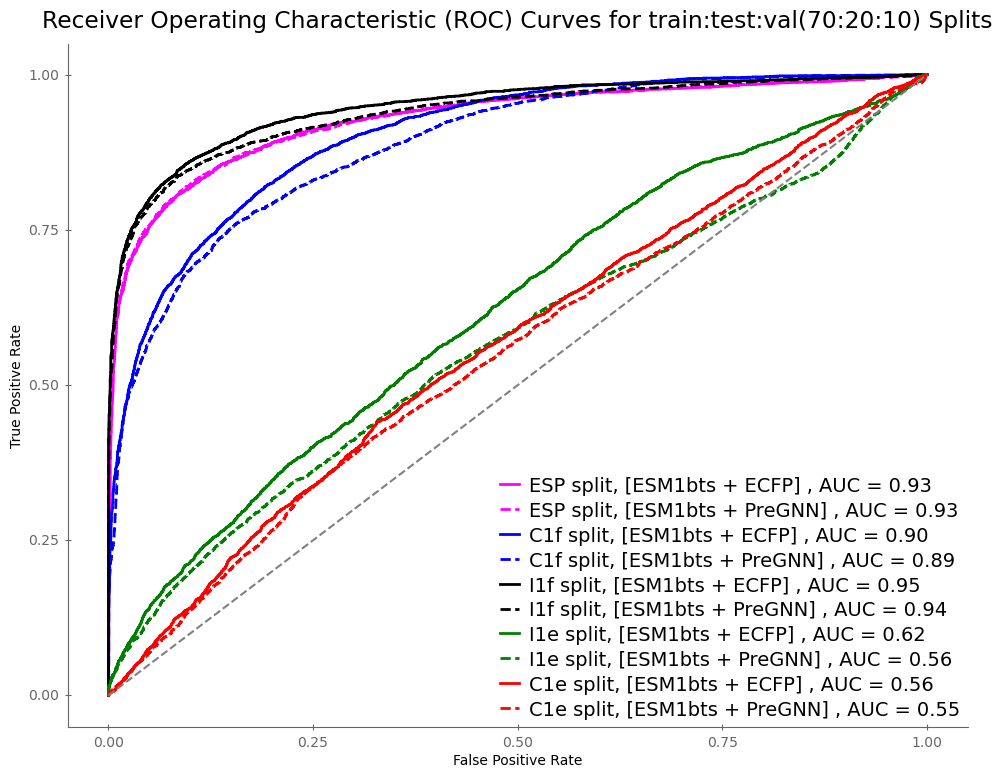

In [6]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} , AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(10, 8))  # Adjusted figure size
plt.rcParams.update({'font.size': 14})  # Adjusted font size

# Define your data and labels here
data = [
    (fpr_esm1b_ts_ecfp_1DRand, tpr_esm1b_ts_ecfp_1DRand, roc_auc_esm1b_ts_ecfp_1DRand, 'ESP split, [ESM1bts + ECFP]', 'solid', 'magenta'),
    (fpr_esm1b_ts_gnn_1DRand, tpr_esm1b_ts_gnn_1DRand, roc_auc_esm1b_ts_gnn_1DRand, 'ESP split, [ESM1bts + PreGNN]', 'dashed', 'magenta'),
    (fpr_esm1b_ts_ecfp_C1f, tpr_esm1b_ts_ecfp_C1f, roc_auc_esm1b_ts_ecfp_C1f, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f, tpr_esm1b_ts_gnn_C1f, roc_auc_esm1b_ts_gnn_C1f, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),
    (fpr_esm1b_ts_ecfp_I1f, tpr_esm1b_ts_ecfp_I1f, roc_auc_esm1b_ts_ecfp_I1f, 'I1f split, [ESM1bts + ECFP]', 'solid', 'black'),
    (fpr_esm1b_ts_gnn_I1f, tpr_esm1b_ts_gnn_I1f, roc_auc_esm1b_ts_gnn_I1f, 'I1f split, [ESM1bts + PreGNN]', 'dashed', 'black'),
    (fpr_esm1b_ts_ecfp_I1e, tpr_esm1b_ts_ecfp_I1e, roc_auc_esm1b_ts_ecfp_I1e, 'I1e split, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_I1e, tpr_esm1b_ts_gnn_I1e, roc_auc_esm1b_ts_gnn_I1e, 'I1e split, [ESM1bts + PreGNN]', 'dashed', 'green'),
    (fpr_esm1b_ts_ecfp_C1e, tpr_esm1b_ts_ecfp_C1e, roc_auc_esm1b_ts_ecfp_C1e, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e, tpr_esm1b_ts_gnn_C1e, roc_auc_esm1b_ts_gnn_C1e, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
]

# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], '--', color='gray', linewidth=1.5)  # Added gray dashed line for reference
plt.xlim([-0.05, 1.05])  # Adjusted limits for better visualization
plt.ylim([-0.05, 1.05])  # Adjusted limits for better visualization
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test:val(70:20:10) Splits')
#plt.grid(True, linestyle='--', alpha=0.7)  # Added grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()
